# Record Cleaning

**Metadata Summary**  
- 📅 **Date of Retrieval:** JULY 1, 2025  
- 🌐 **Source of Data:** LGU San Jacinto Treasury Records
- 📄 **License/Permission:**  
- 🧑‍💼 **Prepared by:** MARK JUNE E. ALMOJUELA

# PREPARATIONS

In [38]:
# Initial Library Import
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [39]:
# File Exploration
data_dir_path = "../../dataset/raw/"
source_folder = "compiled"

# Map month prefixes to their numeric order
month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

try:
    years = [year for year in os.listdir(data_dir_path) if os.path.isdir(os.path.join(data_dir_path, year))]
    print("Available years:", years, '\n')

    for year in years:
        try:
            folder_path = os.path.join(data_dir_path, year, source_folder)
            csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

            # Sort by mapped month order using the first 3 characters
            sorted_files = sorted(
                csv_files,
                key=lambda x: month_map.get(x[:3].upper(), 99)  # Defaults to end if unrecognized prefix
            )

            print(f"{year}: {sorted_files}; \nCOUNT: {len(sorted_files)}\n")

        except FileNotFoundError:
            continue
        except NotADirectoryError:
            print("Path is not a directory")
        except PermissionError:
            print("Permission denied")
        except Exception as e:
            print(f"An error occurred: {e}")

except Exception as e:
    print(f"An error occurred: {e}")

Available years: ['2019', '2020', '2021', '2022', '2023', '2024', '2025'] 

2019: ['DEC_2019.csv']; 
COUNT: 1

2020: ['JAN_2020.csv', 'FEB_2020.csv', 'MAR_2020.csv', 'MAR_APR_2020.csv', 'APR_2020.csv', 'MAY_2020.csv', 'JUN_2020.csv', 'JUL_2020.csv', 'AUG_2020.csv', 'SEP_2020.csv', 'OCT_2020.csv', 'NOV_2020.csv']; 
COUNT: 12

2022: ['JAN_2022.csv', 'FEB_2022.csv', 'MAR_2022.csv', 'APR_2022.csv', 'MAY_2022.csv', 'JUN_2022.csv', 'JUL_2022.csv', 'AUG_2022.csv', 'SEP_2022.csv', 'OCT_2022.csv', 'NOV_2022.csv', 'DEC_2022.csv']; 
COUNT: 12

2023: ['JAN_2023.csv', 'FEB_2023.csv', 'MAR_2023.csv', 'APR_2023.csv', 'MAY_2023.csv', 'JUN_2023.csv', 'JUL_2023.csv', 'AUG_2023.csv', 'SEP_2023.csv', 'OCT_2023.csv', 'NOV_2023.csv', 'DEC_2023.csv']; 
COUNT: 12

2024: ['JAN_2024.csv', 'FEB_2024.csv', 'MAR_2024.csv', 'APR_2024.csv', 'MAY_2024.csv', 'JUN_2024.csv', 'JUL_2024.csv', 'AUG_2024.csv', 'SEP_2024.csv', 'OCT_2024.csv', 'NOV_2024.csv', 'DEC_2024.csv']; 
COUNT: 12

2025: ['JAN_2025.csv', 'FEB_2025.csv'

# INITIAL NORMALIZATION

In [40]:
# Initialization
%pip install dash 
%pip install missingno
%pip install dash-bootstrap-components

import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import re
import os
from dash import dcc, html, dash_table
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import missingno as msno
from dash.dependencies import Input, Output
import io
import base64
from PIL import Image
import matplotlib.pyplot as plt

import dash_bootstrap_components as dbc


# NOTE: Run this cell only once

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Standardize the column names

In [41]:
from pathlib import Path
import re

source_folder = 'compiled'
output_dir = 'preprocessed'
source_dir = 'raw'

source_dir = Path(f"../../dataset/{source_dir}")
output_dir = Path(f"../../dataset/{output_dir}")
years = os.listdir(source_dir)

distinct_columns = set()
new_columns = {'Consumer\'s Name': 'Account Name', 'Water Meter Serial #': 'Meter Serial Number', 'Meter Serial No.': 'Meter Serial Number',
                'Present': 'Present Reading', 'Previous': 'Previous Reading', 'Consumption': 'Consumption', 'Status': 'Connection Status',
                'Address': 'Service Address', 'Type': 'Connection Type', 'Cons.': 'Consumption', 'Amount': 'Bill Amount', 'Control No.': 'Control Number'}
valid_columns = ['Consumption', 'Control Number', 'Account Name', 'Service Address', 'Present Reading', 'Connection Status', 'Bill Amount', 'Connection Type', 'Meter Serial Number', 'Previous Reading']

for year in years:
    try:
        files = os.listdir(source_dir / year / source_folder)
        os.makedirs(output_dir / year, exist_ok=True)
        for file in files:
            if not re.fullmatch(r'^[A-Z]{3}_[A-Z]{3}_\d{4}\.csv', file):
                df = pd.read_csv(source_dir / year / source_folder / file, encoding='latin1')
                df.columns = df.columns.str.strip()
                df.rename(columns=new_columns, inplace=True)
                distinct_columns.update(df.columns)

                if df.columns.isin(valid_columns).all():
                    cutoff = file.find(".csv")
                    df.to_csv(output_dir / year / f'{file[:cutoff]}_preprocessed.csv', index=False)
    except FileNotFoundError:
        continue

for col in distinct_columns:
    print(col)


Previous Reading
Bill Amount
Account Name
Connection Status
Control Number
Connection Type
Meter Serial Number
Present Reading
Consumption
Service Address


In [42]:
# Drop the old preprocessed files
source_dir = 'preprocessed'
source_dir = Path(f"../../dataset/{source_dir}")


for year in years:
    try:
        files = os.listdir(source_dir / year)
        for file in files:
            if re.fullmatch(r'^[A-Z]{3}\d{4}_preprocessed.csv', file) or re.fullmatch(r'^[A-Z]{3}_\d{4}\.csv_\d{4}_preprocessed.csv$', file):
                os.remove(source_dir / year / file)
    except FileNotFoundError:
        continue

In [43]:
for year in years:
    try:
        source_dir = Path(f"../../dataset/preprocessed/{year}")
        files = os.listdir(source_dir)

        files.sort()

        for file in files:
            print(file)
            df = pd.read_csv(source_dir / file)
            print(df.info())
    except FileNotFoundError:
        continue

DEC_2019_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1566 non-null   float64
 1   Account Name      1575 non-null   object 
 2   Service Address   1575 non-null   object 
 3   Previous Reading  1469 non-null   object 
 4   Present Reading   650 non-null    object 
 5   Consumption       835 non-null    float64
 6   Bill Amount       639 non-null    float64
dtypes: float64(3), object(4)
memory usage: 86.3+ KB
None
APR_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Control Number       1632 non-null   float64
 1   Account Name         1633 non-null   object 
 2   Service Address      1633 non-null   object 
 3   

# Main Cleaning

In [44]:
# Explore unique values
unique_values = set()
base_dir_path = Path("../../dataset/preprocessed")
years = os.listdir(base_dir_path)
column_name = "Service Address"
should_filter_numeric = True

def is_numeric(value):
    try:
        float(str(value))
        return True
    except ValueError:
        return False

filtered_values = [v for v in unique_values if not is_numeric(v)]

for year in years:
    folder_path = Path("../../dataset/preprocessed") / year
    for file_path in folder_path.iterdir():
        if file_path.is_file() and file_path.suffix == ".csv":
            df = pd.read_csv(file_path)
            try:
                unique_values.update(df[column_name].unique())
            except KeyError:
                continue

filtered_values = [value for value in unique_values if not is_numeric(value)]
for address in sorted(map(str, filtered_values)):
    print(address)


Alicante St.
Alicante St., Dist. 1
Alicante St., Dist. 2
Alicante St., Dist. 3
Alicante St., Dist. 4
Almonte St.
Almonte St., Dist. 1
Almonte St., Dist. 3
Altarejos St.
Altarejos St., Dist. 3
Amican St.
Amican St., Dist. 3
Bailon St.
Bailon St. Dist. 2
Bailon St., Dist. 1
Bailon St., Dist. 2
Balcavem St.
Balcavem St., Dist. 2
Balintong St.
Balintong St., Dist. 3
Barsaga St.
Barsaga St., Dist. 4
Bartolabac St.
Bartolabac St. 
Bartolabac St. 1
Bartolabac St., Dist. 1
Bartolabac St., Dist. 3
Bartolay St.
Bartolay St. Dist. 1
Bartolay St. Dist. 3
Bartolay St. Dist. 4
Bartolay St., Dist. 1
Bartolay St., Dist. 3
Bartolay St., Dist. 4
Binaliw, Burgos
Don Juan St.
Don Juan St., Dist. 2
Esparrago St.
Esparrago St., Dist. 1
Esparrago St., Dist. 2
Esparrago St., Dist. 3
Esparrago St., Dist. 4
Espinosa St.
Espinosa St., Dist. 1
Espinosa St., Dist. 3
Fabmar St.
Fabmar St., Dist. 2
Fabmar St., Dist. 3
Fabmar St., Lipata
Flores St.
Flores St., Dist. 3
Flores St., Dist. 4
Grafilo St.
Grafilo St., Dist

In [45]:
# Dataset Cleaning Script: Billing Data Preprocessor
# Author: [Mark June Almojuela]
# Purpose: Detect anomalies, correct missing values, and export a cleaned dataset
# ----------------------------------------------------------------------------------

import os
import pandas as pd
from pathlib import Path
import utilities as util

# Known Anomaly Codes (Reading Flags)
invalid_reading_codes = {
    'DE12': 'Invalid Reading',
    'NR': 'Invalid Reading',
    'DI61': 'Invalid Reading',
    'DI21': 'Invalid Reading',
    'DI43': 'Invalid Reading',
    'DI07': 'Invalid Reading',
    'DISC.': 'Disconnected',
    'DEFECT': 'Defect',
    'DEFET': 'Defect',
    'TEMP. CLOSED': 'Temporarily Closed',
    'DISC': 'Disconnected',
    'Defect': 'Defect',
    'CLOSED': 'Temporarily Closed',
    'CLOSED HOUSE': 'Temporarily Closed',
    'DI16': 'Disconnected',
    'DI80': 'Disconnected',
    'DiSC.': 'Disconnected',
    'Disc': 'Disconnected',
    'MOIST': 'Invalid Reading',
    'New Meter': 'New Meter',
    'T-CLOSE': 'Temporarily Closed',
    'T-DEFECT': 'Defect',
    'T-Disc': 'Disconnected',
    'TECH. DEFECT': 'Defect',
    'TEMP. DISC.': 'Disconnected',
    'UNLOCATED METER': 'Invalid Reading',
    'close': 'Temporarily Closed',
    'def': 'Defect',
    'defect': 'Defect',
    'diSC.': 'Disconnected',
    'dis': 'Disconnected',
    'disc': 'Disconnected',
    'disc.': 'Disconnected',
    'moist': 'Invalid Reading',
    'nm': 'Invalid Reading',
    'nr': 'Invalid Reading',
    'unlocated meter': 'Invalid Reading'
}

# Account Name Normalization
def normalize_name(df):
    """
    Normalize special characters in names before validation
    """
    # Work on the 'Account Name' column directly
    col = df['Account Name']

    replacements = {
        'Ã±': 'ñ',
        'Ã': 'í',
        'ñ': 'n', 'Ñ': 'N',
        'á': 'a', 'Á': 'A',
        'â': "'",
        'é': 'e', 'É': 'E',
        'í': 'i', 'Í': 'I',
        'ó': 'o', 'Ó': 'O',
        'ú': 'u', 'Ú': 'U',
        'ü': 'u', 'Ü': 'U'
    }

    for old, new in replacements.items():
        col = col.str.replace(old, new, regex=False)

    df['Account Name'] = col
    return df


# Helper Function: Check if Value Is Numeric
def is_numeric(value):
    try:
        if pd.isna(value):
            return False
        float(value)
        return True
    except (ValueError, TypeError):
        return False

# Core Cleaning Function: Processes Raw Billing Data
def clean_billing_df(df):
    # Initialize output columns
    df["Cleaned Previous Reading"] = None
    df["Cleaned Present Reading"] = None
    df["Connection Status"] = None
    df["Record Status"] = None

    # Row-wise cleansing logic
    for index, row in df.iterrows():
        present_val = row["Present Reading"]
        previous_val = row["Previous Reading"]

        present = str(present_val) if pd.notna(present_val) else ""
        previous = str(previous_val) if pd.notna(previous_val) else ""

        # Case 1: Anomaly code detected in Present or Previous
        if present in invalid_reading_codes or previous in invalid_reading_codes:
            code = present if present in invalid_reading_codes else previous
            df.at[index, "Connection Status"] = invalid_reading_codes[code]

            # Retain usable numeric data if available
            if pd.isna(row["Previous Reading"]) and pd.isna(row["Present Reading"]):
                df.at[index, "Record Status"] = "Empty"
            else:
                df.at[index, "Record Status"] = "Corrected"
            
            df.at[index, "Cleaned Previous Reading"] = row["Previous Reading"] if is_numeric(row["Previous Reading"]) else (
                row["Present Reading"] if is_numeric(row["Present Reading"]) else None)
            df.at[index, "Cleaned Present Reading"] = row["Present Reading"] if is_numeric(row["Present Reading"]) else (
                row["Previous Reading"] if is_numeric(row["Previous Reading"]) else None)

            # Sanitize raw values for downstream use
            df.at[index, "Previous Reading"] = None if previous in invalid_reading_codes else row["Previous Reading"]
            df.at[index, "Present Reading"] = None if present in invalid_reading_codes else row["Present Reading"]

        # Case 2: Missing Present but valid Previous
        elif pd.isna(row["Present Reading"]) and is_numeric(row["Previous Reading"]):
            df.at[index, "Cleaned Previous Reading"] = row["Previous Reading"]
            df.at[index, "Cleaned Present Reading"] = row["Previous Reading"]
            df.at[index, "Record Status"] = "Corrected"
            df.at[index, "Connection Status"] = "Active"

        # Case 3: Missing Previous but valid Present
        elif is_numeric(row["Present Reading"]) and pd.isna(row["Previous Reading"]):
            df.at[index, "Cleaned Previous Reading"] = row["Present Reading"]
            df.at[index, "Cleaned Present Reading"] = row["Present Reading"]
            df.at[index, "Record Status"] = "Corrected"
            df.at[index, "Connection Status"] = "Active"

        # Case 4: Both values are valid and numeric
        elif is_numeric(row["Present Reading"]) and is_numeric(row["Previous Reading"]):
            df.at[index, "Cleaned Previous Reading"] = row["Previous Reading"]
            df.at[index, "Cleaned Present Reading"] = row["Present Reading"]
            df.at[index, "Record Status"] = "Unchanged"
            df.at[index, "Connection Status"] = "Active"

        # Case 5: Both values missing
        elif pd.isna(row["Present Reading"]) and pd.isna(row["Previous Reading"]):
            df.at[index, "Connection Status"] = "Unknown"
            df.at[index, "Cleaned Previous Reading"] = None
            df.at[index, "Cleaned Present Reading"] = None
            df.at[index, "Record Status"] = "Empty"

        # Case 6: Fallback condition
        else:
            df.at[index, "Connection Status"] = "Unknown"

        if pd.notna(row['Cleaned Previous Reading']) and pd.notna(row['Cleaned Present Reading']) and row['Cleaned Previous Reading'] > row['Cleaned Present Reading']:
            df.at[index, 'Record Status'] = 'Invalid'

        elif pd.isna(row['Cleaned Previous Reading']) and pd.isna(row['Cleaned Present Reading']):
            df.at[index, 'Record Status'] = 'Corrected'

    return df

def compute_consumption(df):
    # Ensure columns are numeric, converting non-numeric to NaN
    df["Cleaned Present Reading"] = pd.to_numeric(df["Cleaned Present Reading"], errors='coerce')
    df["Cleaned Previous Reading"] = pd.to_numeric(df["Cleaned Previous Reading"], errors='coerce')
    
    # Create a mask for valid records
    valid_mask = ~df['Record Status'].isin(['Invalid', 'Empty'])
    
    # Initialize the column with 0
    df["Cleaned Consumption"] = 0
    
    # Calculate consumption only for valid records where both values are not null
    mask = valid_mask & df["Cleaned Present Reading"].notna() & df["Cleaned Previous Reading"].notna()
    df.loc[mask, "Cleaned Consumption"] = (
        df.loc[mask, "Cleaned Present Reading"] - 
        df.loc[mask, "Cleaned Previous Reading"]
    )
    
    # Handle cases where consumption would be negative (which might indicate a meter reset)
    df.loc[df["Cleaned Consumption"] < 0, "Cleaned Consumption"] = 0
    
    return df

def add_month_year(df):
    df["Month"] = month
    df["Year"] = year
    df['Quarter'] = df['Month'].map({
        'JAN': 'Q1',
        'FEB': 'Q1',
        'MAR': 'Q1',
        'APR': 'Q2',
        'MAY': 'Q2',
        'JUN': 'Q2',
        'JUL': 'Q3',
        'AUG': 'Q3',
        'SEP': 'Q3',
        'OCT': 'Q4',
        'NOV': 'Q4',
        'DEC': 'Q4'
    })
    return df


# Mapping Dictionaries
districts = {
    'DIST 1': 'District 1',
    'DIST 2': 'District 2',
    'DIST 3': 'District 3',
    'DIST 4': 'District 4',
    'BLISS': 'Burgos',
    '1': 'District 1',
    '2': 'District 2',
    '3': 'District 3',
    '4': 'District 4',
}

streets = {
    '0': None,
    'ALICANTE ST': 'Alicante Street',
    'ALMONTE ST': 'Almonte Street',
    'ALTAREJOS ST': 'Altarejos Street',
    'AMICAN ST': 'Amican Street',
    'BALCAVEM ST': 'Balcavem Street',
    'BALINTONG ST': 'Balintong Street',
    'BARSAGA ST': 'Barsaga Street',
    'BARTOLABAC ST 1': 'Bartolabac Street',
    'BARTOLABAC ST': 'Bartolabac Street',
    'BARTOLAY ST DIST 1': 'Bartolay Street',
    'BARTOLAY ST DIST 3': 'Bartolay Street',
    'BARTOLAY ST DIST 4': 'Bartolay Street',
    'BARTOLAY ST': 'Bartolay Street',
    'BAILON ST DIST 2': 'Bailon Street',
    'BAILON ST': 'Bailon Street',
    'BINALI': 'Binaliw',
    'DON JUAN ST': 'Don Juan Street',
    'ESPARRAGO ST': 'Esparrago Street',
    'ESPINOSA ST': 'Espinosa Street',
    'FABMAR ST': 'Fabmar Street',
    'FLORES ST': 'Flores Street',
    'GRAFILO ST': 'Grafilo Street',
    'GUTIERREZ ST': 'Gutierrez Street',
    'JONES ST': 'Jones Street',
    'LETADA ST': 'Letada Street',
    'LIQUE ST': 'Lique Street',
    'MOYOT ST DIST 1': 'Moyot Street',
    'MOYOT ST DIST 2': 'Moyot Street',
    'MOYOT ST': 'Moyot Street',
    'NHA DUPLEX': 'NHA Duplex',
    'PUR': 'Puro',
    'TALAB': 'Talaba',
    'TANGNA': 'Tangnan',
    'UPPE': 'Upper Bliss',
    'UPPER': 'Upper Bliss',
    'VILLAMOR ST': 'Villamor Street'
}


def split_address(df):
    if 'Service Address' in df.columns:
        # Normalize: turn ". " into "., " so both formats behave alike        
        df['Service Address'] = (
            df['Service Address']
            .astype(str)
            .str.strip()
            # ". " or "., " → ", "
            .str.replace(r'\.\s*,?\s*([A-Za-z])', r', \1', regex=True)
            # Multiple spaces after comma → single space
            .str.replace(r',\s*([A-Za-z])', r', \1', regex=True)
        )

        df['Street'] = ''
        df['District'] = ''

        for idx, address in df['Service Address'].items():
            address = str(address).strip()

            # Split once on ".,"
            parts = address.split(', ', 1)

            if len(parts) == 2:
                street_key = parts[0].replace('.', '').strip().upper()
                district_key = parts[1].replace('.', '').strip().upper()
                df.at[idx, 'Street'] = streets.get(street_key, parts[0].strip())
                df.at[idx, 'District'] = districts.get(district_key, parts[1].strip())
            elif address:
                df.at[idx, 'Street'] = streets.get(address.replace('.', '').strip().upper(), address.strip())
                df.at[idx, 'District'] = None
            else:
                df.at[idx, 'Street'] = None
                df.at[idx, 'District'] = None

    return df


def standardize_connection_type(df):
    if 'Connection Type' in df.columns:
        types = {
            'R': 'Residential',
            'I': 'Industrial',
            'C': 'Commercial',
        }
        df['Connection Type'] = df['Connection Type'].str.strip().str.upper().replace(types)
    return df

def change_dtype(df):
    df['Control Number'] = df['Control Number'].astype(str)
    df['Month'] = df['Month'].astype(str)
    df['Quarter'] = df['Quarter'].astype(str)
    df['Account Name'] = df['Account Name'].astype(str)
    df['Service Address'] = df['Service Address'].astype(str)
    df['Record Status'] = df['Record Status'].astype(str)
    df['Connection Status'] = df['Connection Status'].astype(str)

    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
    df['Cleaned Consumption'] = pd.to_numeric(df['Cleaned Consumption'], errors='coerce').astype(int)

    return df

def sanitize_control_numbers(df):
    df['Control Number'] = df['Control Number'].str.strip().str.replace('.0', '')
    return df

# 📐 Desired Output Column Order (Report-Ready)
ordered_columns = [
    "Month",
    "Year",
    "Quarter",
    "District",
    "Street",
    "Control Number",
    "Account Name",
    "Connection Type",
    "Service Address",
    "Previous Reading",
    "Present Reading",
    "Cleaned Previous Reading",
    "Cleaned Present Reading",
    "Cleaned Consumption",
    "Record Status",
    "Connection Status"
]

base_dir_path = Path("../../dataset/preprocessed")
output_dir_path = Path("../../dataset/clean/production/semi_clean")

years = os.listdir(base_dir_path)

# Paths and Filenames
for year in years:
    files = os.listdir(base_dir_path / year)
    os.makedirs(output_dir_path / year, exist_ok=True)
    for file in files:
        month = file[0:3].upper()
        file_path = base_dir_path / year / file
        output_dir = output_dir_path / year

        raw_df = pd.DataFrame()

        try:
            raw_df = util.read_csv(file_path)
        except UnicodeDecodeError as e:
            print(f"Failed to read {file_path}: {e}")
            continue

        # 🧼 Run Cleaning Logic
        cleaned_df = clean_billing_df(raw_df)
        cleaned_df = compute_consumption(cleaned_df)
        cleaned_df = add_month_year(cleaned_df)
        cleaned_df = change_dtype(cleaned_df)
        cleaned_df = standardize_connection_type(cleaned_df)
        cleaned_df = split_address(cleaned_df)
        cleaned_df = normalize_name(cleaned_df)
        final_df = sanitize_control_numbers(cleaned_df)

        # 🧾 Reorder Columns for Consistent Output
        final_columns = [col for col in ordered_columns if col in final_df.columns]
        ordered_cleaned_df = final_df[final_columns]

        # 👀 Preview Top 5 Cleaned Records
        print(f"\n📊 Cleaned Preview: {month} {year}")
        print(ordered_cleaned_df.head())

        # 📈 Status Summary
        print("\n🧾 Record Status Summary:")
        print(ordered_cleaned_df["Record Status"].value_counts())

        print("\n🧾 Dataset Shape: ")
        print(ordered_cleaned_df.shape)

        # 💾 Save Cleaned Dataset
        os.makedirs(output_dir, exist_ok=True)
        ordered_cleaned_df.to_csv(output_dir / f"{month}_{year}_semi_clean.csv", index=False)

        print(f"\n✅ Cleaned data exported successfully to: {output_dir}")

print("\n✅ All datasets cleaned and exported successfully!")


📊 Cleaned Preview: DEC 2019
  Month  Year Quarter District           Street Control Number  \
0   DEC  2019      Q4     None  Alicante Street         501549   
1   DEC  2019      Q4     None  Alicante Street         500750   
2   DEC  2019      Q4     None  Alicante Street         500990   
3   DEC  2019      Q4     None  Alicante Street         500505   
4   DEC  2019      Q4     None  Alicante Street         501542   

          Account Name Service Address Previous Reading Present Reading  \
0       Albano, Lilane    Alicante St.              198             NaN   
1  Aljecera, Marcelino    Alicante St.             None             NaN   
2       Alminana, Irus    Alicante St.              437             NaN   
3       Almine, Edison    Alicante St.             None             NaN   
4       Almine, Filben    Alicante St.             3211             NaN   

   Cleaned Previous Reading  Cleaned Present Reading  Cleaned Consumption  \
0                     198.0                   

# Dataset Merge-Fill

In [46]:
# Helper Function: Check for Duplicated Values
base_dir_path = Path("../../dataset/clean/production/semi_clean")

duplicated_values = set()

years = os.listdir(base_dir_path)
for year in years:
    try:
        files = os.listdir(base_dir_path / year)
        for file in files:
            df = pd.read_csv(base_dir_path / year / file)
            duplicated_values.update(df['District'].unique())
    except NotADirectoryError as e:
        continue

if duplicated_values:
    print("Duplicated Values:")
    for value in duplicated_values:
        print(value)
else:
    print("No duplicated values found.")


Duplicated Values:
District 4
Calipat-an
District 1
District 2
District 3
Lipata
Burgos
nan


In [47]:
# Helper Function: Check for Column Checks
base_dir_path = Path("../../dataset/clean/production/semi_clean")

years = os.listdir(base_dir_path)
for year in years:
    try:
        files = os.listdir(base_dir_path / year)
        for file in files:
            df = pd.read_csv(base_dir_path / year / file)
            print(f"{year} {file}")
            print(df.columns)
    except NotADirectoryError as e:
        continue



2019 DEC_2019_semi_clean.csv
Index(['Month', 'Year', 'Quarter', 'District', 'Street', 'Control Number',
       'Account Name', 'Service Address', 'Previous Reading',
       'Present Reading', 'Cleaned Previous Reading',
       'Cleaned Present Reading', 'Cleaned Consumption', 'Record Status',
       'Connection Status'],
      dtype='object')
2020 APR_2020_semi_clean.csv
Index(['Month', 'Year', 'Quarter', 'District', 'Street', 'Control Number',
       'Account Name', 'Service Address', 'Previous Reading',
       'Present Reading', 'Cleaned Previous Reading',
       'Cleaned Present Reading', 'Cleaned Consumption', 'Record Status',
       'Connection Status'],
      dtype='object')
2020 AUG_2020_semi_clean.csv
Index(['Month', 'Year', 'Quarter', 'District', 'Street', 'Control Number',
       'Account Name', 'Service Address', 'Previous Reading',
       'Present Reading', 'Cleaned Previous Reading',
       'Cleaned Present Reading', 'Cleaned Consumption', 'Record Status',
       'Connecti

In [48]:
import pandas as pd
import os
from pathlib import Path
import utilities as util
import re
import numpy as np

# Paths
base_dir_path = Path("../../dataset/clean/production/semi_clean")
output_dir_path = Path("../../dataset/clean/production/semi_clean")
assert base_dir_path.exists(), "Base directory does not exist"
assert output_dir_path.exists(), "Output directory does not exist"

# Extract and standardize Street and District
def parse_address(row):
    street_val = str(row['Street']).strip().upper() if pd.notna(row['Street']) else None
    district_val = str(row['District']).strip().upper() if pd.notna(row['District']) else None
    street = streets.get(street_val, row['Street'])
    district = districts.get(district_val, row['District'])
    return pd.Series([street, district])

def normalize_name(name):
    """
    Normalize special characters in names before validation
    """
    if pd.isna(name) or not isinstance(name, str):
        return name
    
    # Replace common encoding issues and special characters
    name = name.replace('Ã±', 'n').replace('Ã', 'í')  # Common encoding fixes
    name = name.replace('iƒÂ±', 'n')
    name = name.replace('ñ', 'n').replace('Ñ', 'N')   # Convert ñ/Ñ to n/N
    name = name.replace('á', 'a').replace('Á', 'A').replace('â', '\'') # Other common accents
    name = name.replace('é', 'e').replace('É', 'E')
    name = name.replace('í', 'i').replace('Í', 'I')
    name = name.replace('ó', 'o').replace('Ó', 'O')
    name = name.replace('ú', 'u').replace('Ú', 'U')
    name = name.replace('ü', 'u').replace('Ü', 'U')
    
    return name

def is_valid_name(name):
    if pd.isna(name) or not isinstance(name, str):
        return False
    # Match only if all characters are allowed (now without special characters)
    return bool(re.match(r'^[A-Za-z0-9(),-.\'/\\ ]+$', name))

def calculate_record_quality_score(row):
    """
    Calculate a quality score for each record to determine the best one
    Higher score = better quality record
    """
    score = 0
    
    # Service Address completeness (40 points max)
    if pd.notna(row.get('Service Address')):
        addr = str(row['Service Address']).strip()
        if len(addr) > 10:  # Reasonable minimum length for address
            score += 40
        elif len(addr) > 5:
            score += 20
    
    # Connection Type quality (30 points max)
    if pd.notna(row.get('Connection Type')):
        conn_type = str(row['Connection Type']).strip().upper()
        # Prioritize specific meaningful connection types
        meaningful_types = ['RESIDENTIAL', 'COMMERCIAL', 'INDUSTRIAL', 'DOMESTIC']
        if conn_type in meaningful_types:
            score += 30
        elif len(conn_type) > 3:  # Any non-trivial connection type
            score += 15
    
    # Account Name validity (20 points max)
    if pd.notna(row.get('Account Name')) and is_valid_name(row['Account Name']):
        score += 20
    
    # District and Street completeness (10 points max)
    if pd.notna(row.get('District')) and pd.notna(row.get('Street')):
        score += 10
    
    return score

# Default structure
default_columns = [
    'Control Number', 
    'Account Name', 
    'Connection Type', 
    'Service Address', 
    'District', 
    'Street'
]

years = [d for d in os.listdir(base_dir_path) if (base_dir_path / d).is_dir()]
master_records = [] 

for year in years:
    year_path = base_dir_path / year
    files = [f for f in os.listdir(year_path) if f.endswith(".csv") and not f.startswith("cleaned_")]

    for file in files:
        print(f"Processing {file}...")
        file_path = year_path / file
        df = util.read_csv(file_path)

        if 'Connection Type' not in df.columns:
            df['Connection Type'] = pd.NA

        df = df[[col for col in default_columns if col in df.columns]]
        df = df.dropna(how='all').reset_index(drop=True)
        
        # NORMALIZE NAMES BEFORE PROCESSING
        if 'Account Name' in df.columns:
            df['Account Name'] = df['Account Name'].apply(normalize_name)
        
        # Parse addresses
        df[['Street', 'District']] = df.apply(parse_address, axis=1)
        
        # Calculate quality score for each record
        df['Quality_Score'] = df.apply(calculate_record_quality_score, axis=1)
        
        master_records.append(df)

# Merge all DataFrames
master_df = pd.concat(master_records, ignore_index=True)
print(f"Records before deduplication: {len(master_df)}")

# Remove duplicates - keeping the record with highest quality score
master_df.sort_values(['Control Number', 'Quality_Score'], 
                     ascending=[True, False], inplace=True)
master_df.drop_duplicates(subset=['Control Number'], keep='first', inplace=True)

# Remove the temporary quality score column
master_df.drop('Quality_Score', axis=1, inplace=True)

# DEBUG: Check names before final filtering
print(f"Records before name validation: {len(master_df)}")
invalid_names = master_df[~master_df['Account Name'].apply(is_valid_name)]
print(f"Invalid names found: {len(invalid_names)}")
if len(invalid_names) > 0:
    print("Sample invalid names:")
    for name in invalid_names['Account Name'].head():
        print(f"  '{name}'")

# Remove invalid names
master_df = master_df[master_df['Account Name'].apply(is_valid_name)]

# Final projection
final_cols = ['Control Number', 'Account Name', 'Connection Type', 'Service Address', 'District', 'Street']
master_df = master_df[final_cols]

# Save
file_path = output_dir_path / "cleaned_master.csv"
if util.save_csv(master_df, file_path):
    print("Master DataFrame saved successfully.")
else:
    print("Failed to save Master DataFrame.")

# Optional: Print quality statistics
print(f"Total unique records: {len(master_df)}")
print(f"Records with complete address: {len(master_df[master_df['Service Address'].notna()])}")
print(f"Records with meaningful connection type: {len(master_df[master_df['Connection Type'].notna()])}")

Processing DEC_2019_semi_clean.csv...
Processing APR_2020_semi_clean.csv...
Processing AUG_2020_semi_clean.csv...
Processing DEC_2020_semi_clean.csv...
Processing FEB_2020_semi_clean.csv...
Processing JAN_2020_semi_clean.csv...
Processing JUL_2020_semi_clean.csv...
Processing JUN_2020_semi_clean.csv...
Processing MAR_2020_semi_clean.csv...
Processing MAY_2020_semi_clean.csv...
Processing NOV_2020_semi_clean.csv...
Processing OCT_2020_semi_clean.csv...
Processing SEP_2020_semi_clean.csv...
Processing APR_2022_semi_clean.csv...
Processing AUG_2022_semi_clean.csv...
Processing DEC_2022_semi_clean.csv...
Processing FEB_2022_semi_clean.csv...
Processing JAN_2022_semi_clean.csv...
Processing JUL_2022_semi_clean.csv...
Processing JUN_2022_semi_clean.csv...
Processing MAR_2022_semi_clean.csv...
Processing MAY_2022_semi_clean.csv...
Processing NOV_2022_semi_clean.csv...
Processing OCT_2022_semi_clean.csv...
Processing SEP_2022_semi_clean.csv...
Processing APR_2023_semi_clean.csv...
Processing A

In [49]:
# Merge the cleaned semi_cleaned datasets with the cleaned master dataset
import os
from pathlib import Path
from string import Template
import utilities as util

def merge_connection_type(df, initial):
    if initial:
        if 'Connection Type' not in df.columns:
            df['Connection Type'] = None
    else:
        df['Connection Type'] = df['Connection Type_master'].where(
            df['Connection Type_master'].notna() & (df['Connection Type_master'].str.strip() != ''), 
            df['Connection Type']
        )
    return df

def merge_service_address(df, initial):
    if initial:
        if 'Service Address' not in df.columns:
            df['Service Address'] = None
    else:
        df['Service Address'] = df['Service Address_master'].where(
            df['Service Address_master'].notna() & (df['Service Address_master'].str.strip() != ''), 
            df['Service Address']
        )
    return df

def merge_district(df, initial):
    if initial:
        if 'District' not in df.columns:
            df['District'] = None
    else:
        df['District'] = df['District_master'].where(
            df['District_master'].notna() & (df['District_master'].str.strip() != ''), 
            df['District']
        )
    return df

def merge_street(df, initial):
    if initial:
        if 'Street' not in df.columns:
            df['Street'] = None
    else:
        df['Street'] = df['Street_master'].where(
            df['Street_master'].notna() & (df['Street_master'].str.strip() != ''), 
            df['Street']
        )
    return df

master_df_path = Path("../../dataset/clean/production/semi_clean/cleaned_master.csv")
base_dir_path = Path("../../dataset/clean/production/semi_clean")
output_dir_path = Path("../../dataset/clean/production/pre_production/")
training_output_dir_path = Path("../../dataset/clean/training/pre_production/")
years = [year for year in os.listdir(base_dir_path) if not year.startswith("cleaned_")]

master_df = util.read_csv(master_df_path)
master_df['Control Number'] = master_df['Control Number'].astype(str).str.strip().str.replace(r'\.0$', '', regex=True)

final_columns = [
    "Month",
    "Year",
    "Quarter",
    "District",
    "Street",
    "Control Number",
    "Account Name",
    "Connection Type",
    "Service Address",
    "Previous Reading",
    "Present Reading",
    "Cleaned Previous Reading",
    "Cleaned Present Reading",
    "Cleaned Consumption",
    "Record Status",
    "Connection Status"
]

for year in years:
    try:
        folder_path = os.path.join(base_dir_path, year)
        output_path = os.path.join(output_dir_path, year)
        os.makedirs(output_path, exist_ok=True)

        csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv") and not f.startswith("cleaned_")]

        for file in csv_files:
            try:
                df = util.read_csv(os.path.join(folder_path, file))

                df['Control Number'] = df['Control Number'].astype(str).str.strip().str.replace(r'\.0$', '', regex=True)
                
                df = merge_connection_type(df, initial=True)
                df = merge_service_address(df, initial=True)
                df = merge_district(df, initial=True)
                df = merge_street(df, initial=True)

                merged_df = df.merge(master_df, on=['Control Number'], how='left', suffixes = ('', '_master'))
                merged_df = merge_connection_type(merged_df, initial=False)
                merged_df = merge_service_address(merged_df, initial=False)
                merged_df = merge_district(merged_df, initial=False)
                merged_df = merge_street(merged_df, initial=False)

                final_df = merged_df[final_columns]

                file_name = file[:3]
                # Production Datasets
                util.save_csv(final_df, os.path.join(output_dir_path, year, file_name + "_" + year + "_pre_production.csv"))

                # Training Datasets
                training_df = final_df.drop('Account Name', axis=1)
                util.save_csv(training_df, os.path.join(training_output_dir_path, year, file_name + "_" + year + "_pre_production.csv"))
            except Exception as e:
                print(f"An error occurred while processing {file}: {e}")

    except FileNotFoundError:
        continue
    except NotADirectoryError as e:
        print("Path is not a directory: ", e)
    except PermissionError as e:
        print("Permission denied", e)
    except Exception as e:
        print(f"An error occurred: {e}")

print("Pre-production dataset has been created successfully.")

Pre-production dataset has been created successfully.


# Dataset Check

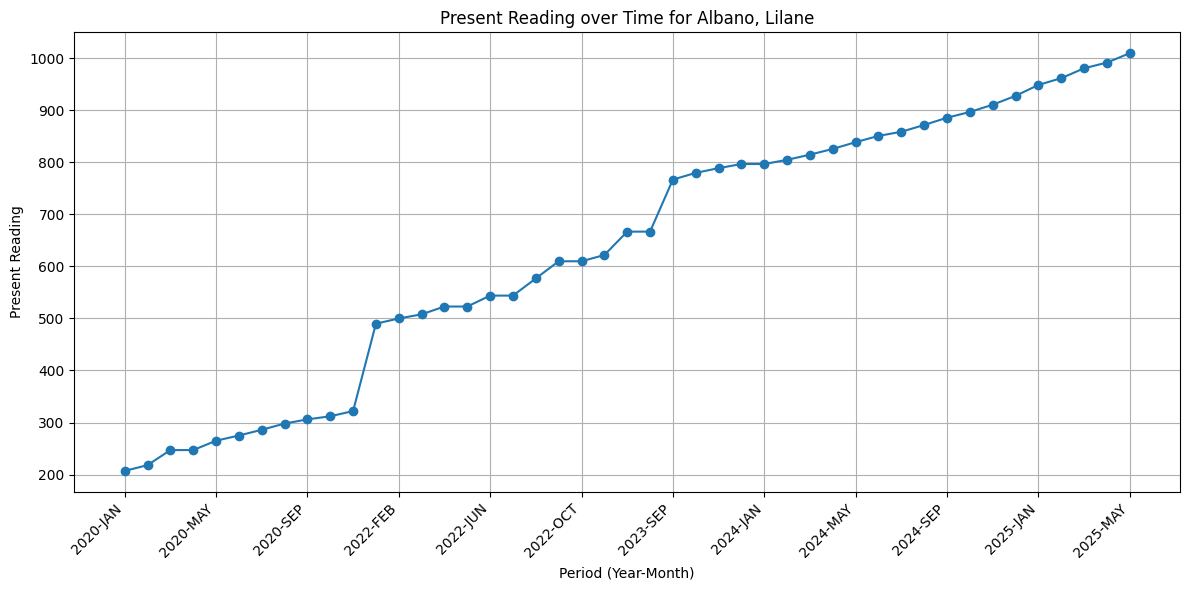

In [66]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import glob
import os

# Specify and filter for a single consumer
consumer_name = 'Albano, Lilane' 

# Define data path
path = "../../dataset/clean/production/pre_production"

# Find all relevant CSV files
all_files = glob.glob(os.path.join(path, "*", "*pre_production.csv"))

# Read CSVs into a list of DataFrames
df_list = [pd.read_csv(file) for file in all_files]

# Concatenate into a single DataFrame
consumer_df = pd.concat(df_list, ignore_index=True)

# Set correct data types and handle conversion errors
consumer_df['Present Reading'] = pd.to_numeric(consumer_df['Present Reading'], errors='coerce')
consumer_df['Year'] = pd.to_numeric(consumer_df['Year'], errors='coerce')
consumer_df.dropna(subset=['Present Reading', 'Year'], inplace=True) 

# Define month order for sorting
month_order = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", 
               "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
consumer_df['Month'] = pd.Categorical(consumer_df['Month'], categories=month_order, ordered=True)

# Sort by year and month
consumer_df = consumer_df.sort_values(by=['Year', 'Month'])

# Create 'Period' column for x-axis
consumer_df['Period'] = consumer_df['Year'].astype(int).astype(str) + "-" + consumer_df['Month'].astype(str)

# Note: Ensure 'Name' matches the column name in your CSV.
specific_consumer_df = consumer_df[consumer_df['Account Name'] == consumer_name].copy()

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot the filtered data
plt.plot(specific_consumer_df['Period'], specific_consumer_df['Present Reading'], marker='o', linestyle='-')

# Set title and labels
plt.title(f"Present Reading over Time for {consumer_name}")
plt.xlabel("Period (Year-Month)")
plt.ylabel("Present Reading")

# Improve x-axis readability
ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=15)) 

# Format plot elements
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [67]:
# Dataset Exploration
base_dir_path = Path("../../dataset/clean/training/semi_clean")

years = os.listdir(base_dir_path)

# Paths and Filenames
for year in years:
    files = os.listdir(base_dir_path / year)
    for file in files:
        month = file.split("_")[0]
        file_path = base_dir_path / year / file
        try:
            raw_df = pd.read_csv(file_path, encoding='latin-1')
        except UnicodeDecodeError:
            try:
                raw_df = pd.read_csv(file_path, encoding='utf-16')
            except UnicodeDecodeError:
                raw_df = pd.read_csv(file_path, encoding='utf-8')

        def check_instance(x):
            if isinstance(x, str) and re.search(r"[a-zA-Z]", x):
                non_numeric_value_list.append(x)
            else:   
                pass

        print(f"Shape of {month}{year}:", raw_df.shape)
        print(raw_df.head())
        print(f"\nDuplicate records in {month}{year}:", raw_df.duplicated(keep='first').sum())
        print(f"Duplicate control number count in {month}{year}:", raw_df["Control Number"].duplicated().sum())

        print(f"\nMissing values in {month}{year}:\n", raw_df.isnull().sum())

        non_numeric_value_list = []

        raw_df["Present Reading"].apply(lambda x: check_instance(x))
        raw_df["Previous Reading"].apply(lambda x: check_instance(x))

        non_numeric_value_list = set(non_numeric_value_list)

        print(f"\nNon-numeric values in {month}{year}: {non_numeric_value_list}")
        print(f"Non-numeric values count in {month}{year}: {len(non_numeric_value_list)}")


Shape of DEC2019: (1575, 15)
  Month  Year Quarter District           Street  Control Number  \
0   DEC  2019      Q4      NaN  Alicante Street        501549.0   
1   DEC  2019      Q4      NaN  Alicante Street        500750.0   
2   DEC  2019      Q4      NaN  Alicante Street        500990.0   
3   DEC  2019      Q4      NaN  Alicante Street        500505.0   
4   DEC  2019      Q4      NaN  Alicante Street        501542.0   

          Account Name Service Address  Previous Reading Present Reading  \
0       Albano, Lilane    Alicante St.             198.0             NaN   
1  Aljecera, Marcelino    Alicante St.               NaN             NaN   
2       Alminana, Irus    Alicante St.             437.0             NaN   
3       Almine, Edison    Alicante St.               NaN             NaN   
4       Almine, Filben    Alicante St.            3211.0             NaN   

   Cleaned Previous Reading  Cleaned Present Reading  Cleaned Consumption  \
0                     198.0       

In [68]:
# Calculate cleaned consumption
df = ordered_cleaned_df.copy()

# Ensure columns are numeric, converting non-numeric to NaN
df["Cleaned Present Reading"] = pd.to_numeric(df["Cleaned Present Reading"], errors='coerce')
df["Cleaned Previous Reading"] = pd.to_numeric(df["Cleaned Previous Reading"], errors='coerce')

# Calculate consumption only for valid records
valid_mask = ~df['Record Status'].isin(['Invalid', 'Empty'])
df["Cleaned Consumption"] = 0
mask = valid_mask & df["Cleaned Present Reading"].notna() & df["Cleaned Previous Reading"].notna()
df.loc[mask, "Cleaned Consumption"] = (
    df.loc[mask, "Cleaned Present Reading"] - 
    df.loc[mask, "Cleaned Previous Reading"]
)
# Handle negative consumption (could indicate meter reset)
df.loc[df["Cleaned Consumption"] < 0, "Cleaned Consumption"] = 0

# 1. Dataset Overview
shape_info = f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns"

# 2. Create figures with white background
# Common layout settings
white_bg = dict(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    xaxis=dict(showgrid=False, linecolor='black', showline=True),
    yaxis=dict(showgrid=False, linecolor='black', showline=True)
)

# Record Status Distribution
status_counts = df["Record Status"].value_counts().reset_index()
status_counts.columns = ["Status", "Count"]
status_fig = px.pie(status_counts, names="Status", values="Count", 
                   title="Record Status Distribution",
                   color_discrete_sequence=px.colors.qualitative.Set3)
status_fig.update_layout(white_bg)

# Connection Status Distribution
connection_counts = df["Connection Status"].value_counts().reset_index()
connection_counts.columns = ["Status", "Count"]
connection_fig = px.bar(connection_counts, x="Status", y="Count", 
                       title="Connection Status Distribution",
                       color="Status",
                       color_discrete_sequence=px.colors.qualitative.Pastel)
connection_fig.update_layout(white_bg)

# Consumption Distribution
consumption_fig = px.histogram(df[df["Cleaned Consumption"] > 0], 
                              x="Cleaned Consumption",
                              title="Distribution of Water Consumption (Excluding Zero Consumption)",
                              nbins=50,
                              color_discrete_sequence=['#636EFA'])
consumption_fig.update_layout(white_bg)

# Summary Statistics for Selected Columns
selected_columns = ['Previous Reading', 'Present Reading', 'Cleaned Previous Reading', 'Cleaned Present Reading', 'Cleaned Consumption']
summary_stats = df[selected_columns].describe().reset_index()

# Initialize the app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div(style={'backgroundColor': 'white'}, children=[
    html.Div([
        html.H1(f"{month} {year} Billing Data Analysis", 
               style={"textAlign": "center", "margin-bottom": "20px", "color": "black"}),
        
        # Dataset Overview Card
        html.Div([
            html.H3("📊 Dataset Overview", style={"color": "black"}),
            html.P(shape_info, style={"color": "black"}),
            html.Hr(),
            
            # Summary Statistics for Selected Columns
            html.H4("Summary Statistics (Numeric Columns)", style={"color": "black", "marginTop": "20px"}),
            dash_table.DataTable(
                columns=[{"name": i, "id": i} for i in summary_stats.columns],
                data=summary_stats.to_dict('records'),
                style_table={'overflowX': 'auto'},
                style_cell={
                    'textAlign': 'left', 
                    'padding': '8px',
                    'color': 'black',
                    'backgroundColor': 'white',
                    'border': '1px solid #ddd'
                },
                style_header={
                    'backgroundColor': 'rgb(230, 230, 230)',
                    'fontWeight': 'bold',
                    'color': 'black'
                },
                style_data_conditional=[
                    {
                        'if': {'row_index': 'odd'},
                        'backgroundColor': 'rgb(248, 248, 248)',
                    }
                ]
            )
        ], style={
            'padding': '20px', 
            'margin': '10px', 
            'border': '1px solid #ddd', 
            'border-radius': '5px',
            'backgroundColor': 'white'
        }),
        
        # First Row: Status Distributions
        html.Div([
            html.Div([
                dcc.Graph(figure=status_fig)
            ], className="six columns"),
            
            html.Div([
                dcc.Graph(figure=connection_fig)
            ], className="six columns")
        ], className="row"),

        # Second Row: Consumption Analysis
        html.Div([
            html.Div([
                dcc.Graph(figure=consumption_fig)
            ], className="twelve columns")
        ], className="row"),
        
        # Data Sample - Updated to include Cleaned Consumption
        html.Div([
            html.H3("Data Sample (First 10 Rows)", style={"color": "black"}),
            dash_table.DataTable(
                data=df[selected_columns].head(10).to_dict('records'),
                columns=[{"name": i, "id": i} for i in selected_columns],
                page_size=10,
                style_table={'overflowX': 'auto'},
                style_cell={
                    'textAlign': 'left',
                    'padding': '8px',
                    'maxWidth': '180px',
                    'textOverflow': 'ellipsis',
                    'whiteSpace': 'normal',
                    'color': 'black',
                    'backgroundColor': 'white',
                    'border': '1px solid #ddd'
                },
                style_header={
                    'backgroundColor': 'rgb(230, 230, 230)',
                    'fontWeight': 'bold',
                    'color': 'black'
                },
                style_data_conditional=[
                    {
                        'if': {'row_index': 'odd'},
                        'backgroundColor': 'rgb(248, 248, 248)',
                    }
                ],
                tooltip_data=[{
                    column: {'value': str(value), 'type': 'markdown'}
                    for column, value in row.items()
                } for row in df[selected_columns].head(10).to_dict('records')],
                tooltip_duration=None
            )
        ], style={
            'padding': '20px', 
            'margin': '10px', 
            'border': '1px solid #ddd', 
            'border-radius': '5px',
            'backgroundColor': 'white'
        }),
    ])
])

# Add some basic styling
app.layout.children.insert(0, html.Div(style={
    'fontFamily': 'Arial, sans-serif', 
    'margin': '0 auto', 
    'maxWidth': '1200px',
    'backgroundColor': 'white',
    'color': 'black'
}))

if __name__ == "__main__":
    app.run(debug=True)
    

# PREPROCESSED DATA REVIEW

In [69]:
# Initialization
year = "2020"

In [70]:
import pandas as pd
import os

# 📁 Base Directory
data_dir_path = "../../dataset/preprocessed/"

# 🗓️ Month Name Mapping
month_order = {
    "JAN": 1, "FEB": 2, "MAR": 3, "APR": 4, "MAY": 5, "JUN": 6,
    "JUL": 7, "AUG": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12
}

csv_files = []

try:
    # Discover available years
    years = [year for year in os.listdir(data_dir_path) if os.path.isdir(os.path.join(data_dir_path, year))]
    print("Available years: ", years, '\n')

    for year in years:
        files = [f for f in os.listdir(os.path.join(data_dir_path, year)) if f.endswith(".csv")]

        # Sort files by month
        sorted_files = sorted(
            files,
            key=lambda x: month_order.get(x[:3].upper(), 99)
        )

        print(f"Year: {year}\nCount: {len(sorted_files)}")
        print("   -------------------------------")
        for f in sorted_files:
            print("     ", f)
        
        print("   -------------------------------")

except FileNotFoundError:
    print("❌ Directory not found")
except NotADirectoryError:
    print("❌ Path is not a directory")
except PermissionError:
    print("❌ Permission denied")
except Exception as e:
    print(f"⚠️ An error occurred: {e}")

Available years:  ['2019', '2020', '2022', '2023', '2024', '2025'] 

Year: 2019
Count: 1
   -------------------------------
      DEC_2019_preprocessed.csv
   -------------------------------
Year: 2020
Count: 12
   -------------------------------
      JAN_2020_preprocessed.csv
      FEB_2020_preprocessed.csv
      MAR_2020_preprocessed.csv
      APR_2020_preprocessed.csv
      MAY_2020_preprocessed.csv
      JUN_2020_preprocessed.csv
      JUL_2020_preprocessed.csv
      AUG_2020_preprocessed.csv
      SEP_2020_preprocessed.csv
      OCT_2020_preprocessed.csv
      NOV_2020_preprocessed.csv
      DEC_2020_preprocessed.csv
   -------------------------------
Year: 2022
Count: 12
   -------------------------------
      JAN_2022_preprocessed.csv
      FEB_2022_preprocessed.csv
      MAR_2022_preprocessed.csv
      APR_2022_preprocessed.csv
      MAY_2022_preprocessed.csv
      JUN_2022_preprocessed.csv
      JUL_2022_preprocessed.csv
      AUG_2022_preprocessed.csv
      SEP_2022_preproc

In [71]:
for csv in csv_files:
    df = pd.read_csv(f'{data_dir_path}{year}/{csv}')
    display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     1579 non-null   object 
 1   Year                      1579 non-null   int64  
 2   Quarter                   1579 non-null   object 
 3   District                  2 non-null      object 
 4   Street                    1579 non-null   object 
 5   Control Number            1572 non-null   float64
 6   Account Name              1579 non-null   object 
 7   Service Address           1579 non-null   object 
 8   Previous Reading          1146 non-null   float64
 9   Present Reading           1120 non-null   float64
 10  Cleaned Previous Reading  1180 non-null   float64
 11  Cleaned Present Reading   1180 non-null   float64
 12  Cleaned Consumption       1579 non-null   int64  
 13  Record Status             1579 non-null   object 
 14  Connecti

Record Status
Corrected    1579
Name: count, dtype: int64

<Axes: >

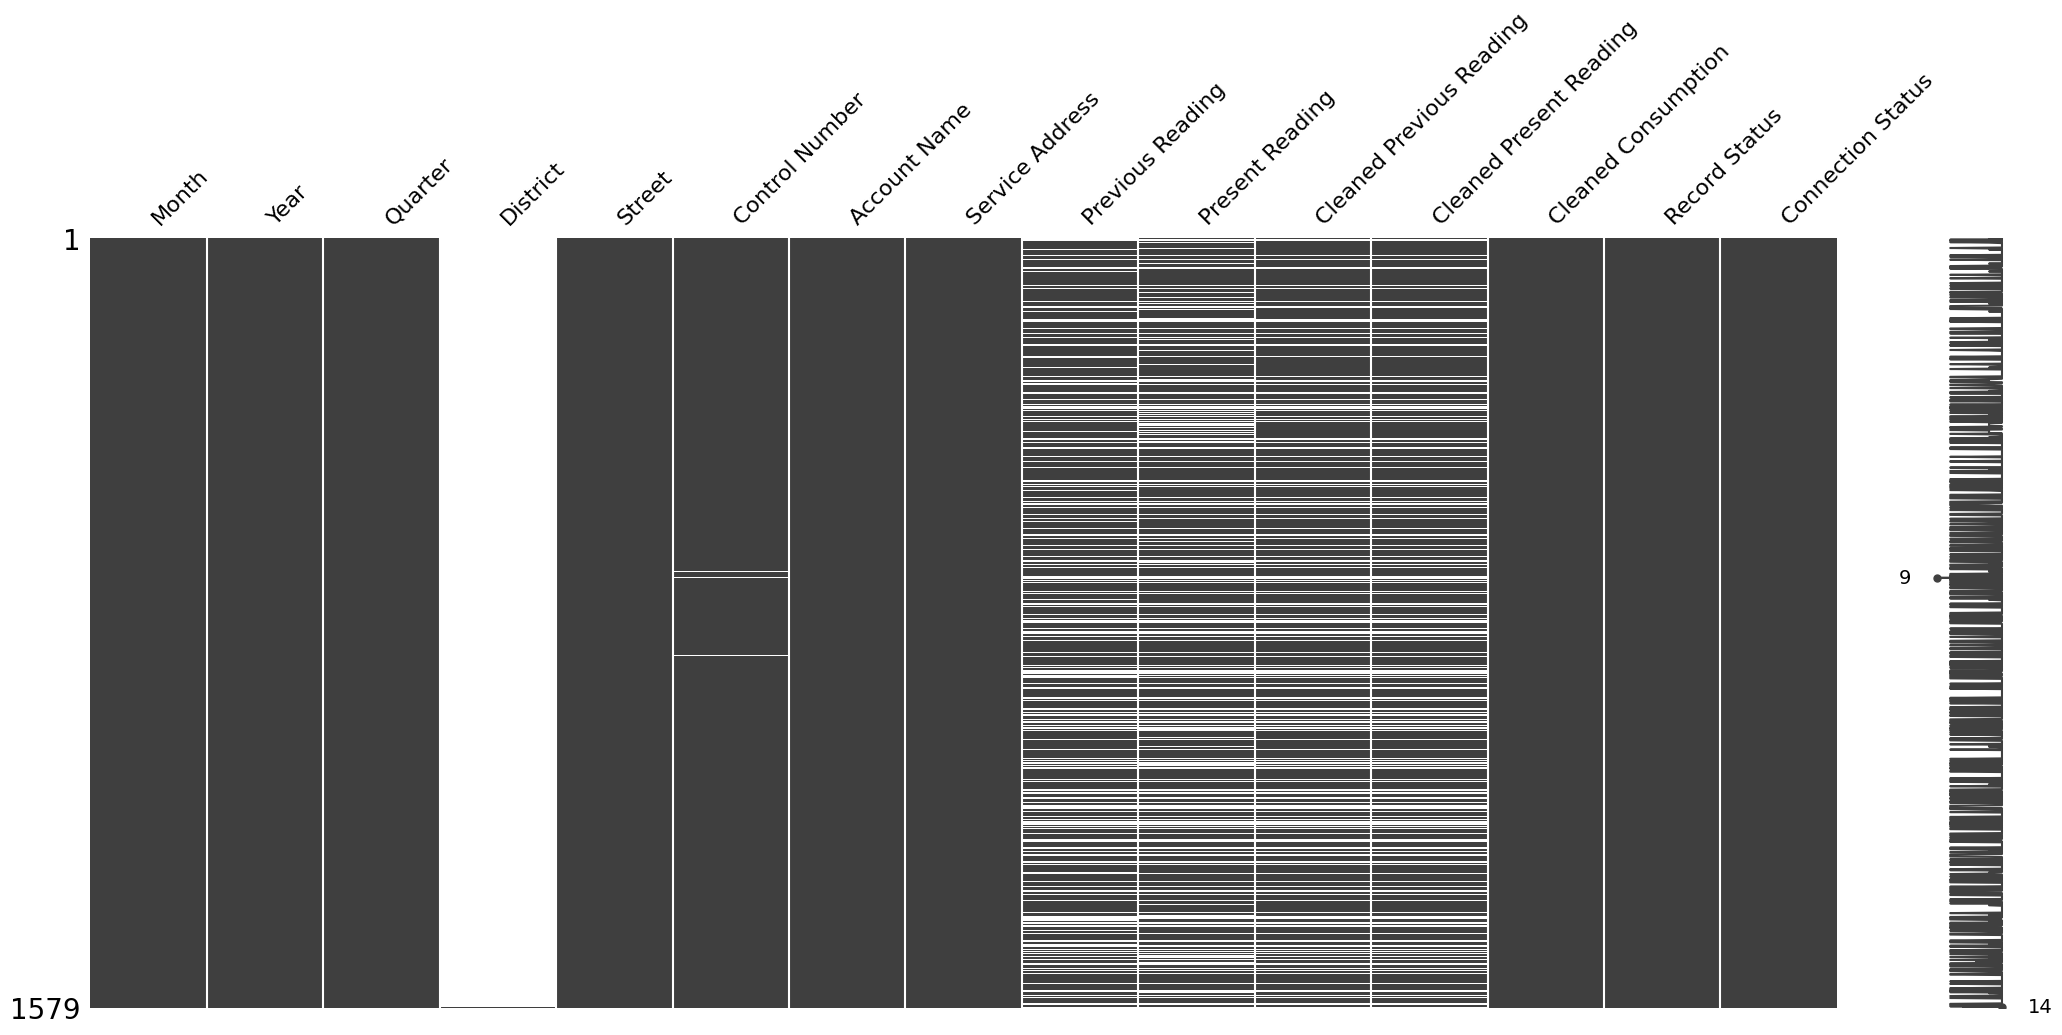

In [72]:
import pandas as pd
import missingno as msno
df = pd.read_csv("../../dataset/clean/training/semi_clean/2020/JAN_2020_semi_clean.csv")
df.info()
display(df['Record Status'].value_counts())

sample_df = df[~df['Record Status'].isin(['Invalid', 'Empty'])]
msno.matrix(sample_df)